In [2]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

print("Python version:", sys.version)
print('tensorflow', tf.__version__)
print('numpy', np.__version__)

Python version: 3.9.7 (default, Sep 16 2021, 16:59:28) [MSC v.1916 64 bit (AMD64)]
tensorflow 2.5.3
numpy 1.19.5


# sequence data

Ht = Fw(Ht-1, Xt)

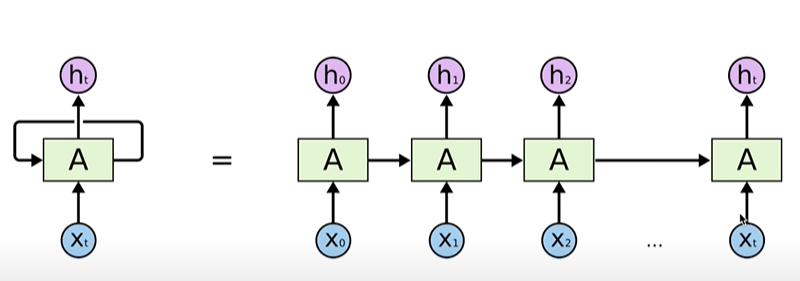

## rnn basic

In [6]:
h = [1, 0, 0, 0]
e = [0, 1, 0, 0]
l = [0, 0, 1, 0]
o = [0, 0, 0, 1]

x_data = np.array([[h]], dtype=np.float32)

hidden_size = 2
cell = tf.keras.layers.SimpleRNNCell(units=hidden_size)
rnn = tf.keras.layers.RNN(cell, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data : {}, shape : {}'.format(x_data, x_data.shape))
print('outputs : {}, shape : {}'.format(outputs, outputs.shape))
print('states : {}, shape : {}'.format(states, states.shape))

x_data : [[[1. 0. 0. 0.]]], shape : (1, 1, 4)
outputs : [[[-0.49911112 -0.6259388 ]]], shape : (1, 1, 2)
states : [[-0.49911112 -0.6259388 ]], shape : (1, 2)


In [8]:
rnn = tf.keras.layers.SimpleRNN(units=hidden_size, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data : {}, shape : {}'.format(x_data, x_data.shape))
print('outputs : {}, shape : {}'.format(outputs, outputs.shape))
print('states : {}, shape : {}'.format(states, states.shape))

x_data : [[[1. 0. 0. 0.]]], shape : (1, 1, 4)
outputs : [[[ 0.6596822  -0.23092155]]], shape : (1, 1, 2)
states : [[ 0.6596822  -0.23092155]], shape : (1, 2)


In [9]:
x_data = np.array([[h, e, l, l, o]], dtype=np.float32)

hidden_size = 2
rnn = tf.keras.layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]], shape: (1, 5, 4) 

outputs: [[[-0.18000744  0.5920968 ]
  [ 0.1974119  -0.8764851 ]
  [-0.78270316  0.79133844]
  [-0.317137   -0.616265  ]
  [-0.63879216 -0.20422658]]], shape: (1, 5, 2) 

states: [[-0.63879216 -0.20422658]], shape: (1, 2)


In [10]:
x_data = np.array([[h, e, l, l, o],
                   [e, o, l, l, l],
                   [l, l, e, e, l]], dtype=np.float32)

hidden_size = 2
rnn = tf.keras.layers.SimpleRNN(units=2, return_sequences=True, return_state=True)
outputs, states = rnn(x_data)

print('x_data: {}, shape: {} \n'.format(x_data, x_data.shape))
print('outputs: {}, shape: {} \n'.format(outputs, outputs.shape))
print('states: {}, shape: {}'.format(states, states.shape))

x_data: [[[1. 0. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 0. 1.]]

 [[0. 1. 0. 0.]
  [0. 0. 0. 1.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 0. 1. 0.]]

 [[0. 0. 1. 0.]
  [0. 0. 1. 0.]
  [0. 1. 0. 0.]
  [0. 1. 0. 0.]
  [0. 0. 1. 0.]]], shape: (3, 5, 4) 

outputs: [[[-0.45912066  0.42984152]
  [-0.7613052  -0.24924004]
  [-0.45285743 -0.343447  ]
  [-0.25340888 -0.13038874]
  [ 0.29228646 -0.53220356]]

 [[-0.6599924   0.32699385]
  [ 0.15266767 -0.8297149 ]
  [ 0.05077619  0.52337134]
  [ 0.529866   -0.5811786 ]
  [ 0.46237874  0.49025398]]

 [[ 0.29275978 -0.22084296]
  [ 0.4284781   0.10671788]
  [-0.34860379  0.4171835 ]
  [-0.7198649  -0.18966915]
  [-0.40020815 -0.37261477]]], shape: (3, 5, 2) 

states: [[ 0.29228646 -0.53220356]
 [ 0.46237874  0.49025398]
 [-0.40020815 -0.37261477]], shape: (3, 2)


## many to one

In [16]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
words = ['good', 'bad', 'worse', 'so good']
y_data = [1,0,0,1]

char_set = ['<pad>'] + sorted(list(set(''.join(words))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', 'a', 'b', 'd', 'e', 'g', 'o', 'r', 's', 'w']
{0: '<pad>', 1: ' ', 2: 'a', 3: 'b', 4: 'd', 5: 'e', 6: 'g', 7: 'o', 8: 'r', 9: 's', 10: 'w'}
{'<pad>': 0, ' ': 1, 'a': 2, 'b': 3, 'd': 4, 'e': 5, 'g': 6, 'o': 7, 'r': 8, 's': 9, 'w': 10}


In [14]:
x_data = list(map(lambda word : [char2idx.get(char) for char in word], words))
x_data_len = list(map(lambda word: len(word), x_data))

print(x_data)
print(x_data_len)

[[6, 7, 7, 4], [3, 2, 4], [10, 7, 8, 9, 5], [9, 7, 1, 6, 7, 7, 4]]
[4, 3, 5, 7]


In [18]:
max_sequence = 10
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                      padding='post', truncating = 'post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 6  7  7  4  0  0  0  0  0  0]
 [ 3  2  4  0  0  0  0  0  0  0]
 [10  7  8  9  5  0  0  0  0  0]
 [ 9  7  1  6  7  7  4  0  0  0]]
[4, 3, 5, 7]
[1, 0, 0, 1]


In [22]:
input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))
hidden_size = 10
num_classes = 2

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = input_dim, output_dim = output_dim,
                                   trainable = False, mask_zero = True, input_length = max_sequence,
                                   embeddings_initializer = tf.keras.initializers.Constant(one_hot)))
model.add(tf.keras.layers.SimpleRNN(units=hidden_size))
model.add(tf.keras.layers.Dense(units=num_classes))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 10, 11)            121       
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 10)                220       
_________________________________________________________________
dense (Dense)                (None, 2)                 22        
Total params: 363
Trainable params: 242
Non-trainable params: 121
_________________________________________________________________


In [28]:
def loss_fn(model, x, y):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true = y,
                                                                         y_pred = model(x),
                                                                         from_logits = True))
lr = 0.01
epochs = 30
batch_size= 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

In [29]:
tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size = 4)
tr_dataset = tr_dataset.batch(batch_size = batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None,)), types: (tf.int32, tf.int32)>


In [31]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch + 1 ) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch+1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.099
epoch :  10, tr_loss : 0.017
epoch :  15, tr_loss : 0.006
epoch :  20, tr_loss : 0.003
epoch :  25, tr_loss : 0.003
epoch :  30, tr_loss : 0.002


acc : 100.00%


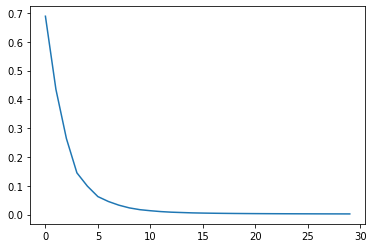

In [32]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('acc : {:.2%}'.format(np.mean(yhat == y_data)))

import matplotlib.pyplot as plt
plt.plot(tr_loss_hist)

## many to one stacking

In [33]:
from pprint import pprint

sentences = ['What I cannot create, I do not understand.',
             'Intellecuals solve problems, geniuses prevent them',
             'A person who never made a mistake never tied anything new.',
             'The same equations have the same solutions.']
y_data = [1,0,0,1] # 1: richard feynman, 0: albert einstein

char_set = ['<pad>'] + sorted(list(set(''.join(sentences))))
idx2char = {idx : char for idx, char in enumerate(char_set)}
char2idx = {char : idx for idx, char in enumerate(char_set)}

print(char_set)
print(idx2char)
print(char2idx)

['<pad>', ' ', ',', '.', 'A', 'I', 'T', 'W', 'a', 'b', 'c', 'd', 'e', 'g', 'h', 'i', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'y']
{0: '<pad>', 1: ' ', 2: ',', 3: '.', 4: 'A', 5: 'I', 6: 'T', 7: 'W', 8: 'a', 9: 'b', 10: 'c', 11: 'd', 12: 'e', 13: 'g', 14: 'h', 15: 'i', 16: 'k', 17: 'l', 18: 'm', 19: 'n', 20: 'o', 21: 'p', 22: 'q', 23: 'r', 24: 's', 25: 't', 26: 'u', 27: 'v', 28: 'w', 29: 'y'}
{'<pad>': 0, ' ': 1, ',': 2, '.': 3, 'A': 4, 'I': 5, 'T': 6, 'W': 7, 'a': 8, 'b': 9, 'c': 10, 'd': 11, 'e': 12, 'g': 13, 'h': 14, 'i': 15, 'k': 16, 'l': 17, 'm': 18, 'n': 19, 'o': 20, 'p': 21, 'q': 22, 'r': 23, 's': 24, 't': 25, 'u': 26, 'v': 27, 'w': 28, 'y': 29}


In [34]:
x_data = list(map(lambda sentence : [char2idx.get(char) for char in sentence], sentences))
x_data_len = list(map(lambda sentence : len(sentence), sentences))

print(x_data)
print(x_data_len)
print(y_data)

[[7, 14, 8, 25, 1, 5, 1, 10, 8, 19, 19, 20, 25, 1, 10, 23, 12, 8, 25, 12, 2, 1, 5, 1, 11, 20, 1, 19, 20, 25, 1, 26, 19, 11, 12, 23, 24, 25, 8, 19, 11, 3], [5, 19, 25, 12, 17, 17, 12, 10, 26, 8, 17, 24, 1, 24, 20, 17, 27, 12, 1, 21, 23, 20, 9, 17, 12, 18, 24, 2, 1, 13, 12, 19, 15, 26, 24, 12, 24, 1, 21, 23, 12, 27, 12, 19, 25, 1, 25, 14, 12, 18], [4, 1, 21, 12, 23, 24, 20, 19, 1, 28, 14, 20, 1, 19, 12, 27, 12, 23, 1, 18, 8, 11, 12, 1, 8, 1, 18, 15, 24, 25, 8, 16, 12, 1, 19, 12, 27, 12, 23, 1, 25, 15, 12, 11, 1, 8, 19, 29, 25, 14, 15, 19, 13, 1, 19, 12, 28, 3], [6, 14, 12, 1, 24, 8, 18, 12, 1, 12, 22, 26, 8, 25, 15, 20, 19, 24, 1, 14, 8, 27, 12, 1, 25, 14, 12, 1, 24, 8, 18, 12, 1, 24, 20, 17, 26, 25, 15, 20, 19, 24, 3]]
[42, 50, 58, 43]
[1, 0, 0, 1]


In [35]:
max_sequence = 55
x_data = pad_sequences(sequences = x_data, maxlen = max_sequence,
                      padding='post', truncating='post')

print(x_data)
print(x_data_len)
print(y_data)

[[ 7 14  8 25  1  5  1 10  8 19 19 20 25  1 10 23 12  8 25 12  2  1  5  1
  11 20  1 19 20 25  1 26 19 11 12 23 24 25  8 19 11  3  0  0  0  0  0  0
   0  0  0  0  0  0  0]
 [ 5 19 25 12 17 17 12 10 26  8 17 24  1 24 20 17 27 12  1 21 23 20  9 17
  12 18 24  2  1 13 12 19 15 26 24 12 24  1 21 23 12 27 12 19 25  1 25 14
  12 18  0  0  0  0  0]
 [ 4  1 21 12 23 24 20 19  1 28 14 20  1 19 12 27 12 23  1 18  8 11 12  1
   8  1 18 15 24 25  8 16 12  1 19 12 27 12 23  1 25 15 12 11  1  8 19 29
  25 14 15 19 13  1 19]
 [ 6 14 12  1 24  8 18 12  1 12 22 26  8 25 15 20 19 24  1 14  8 27 12  1
  25 14 12  1 24  8 18 12  1 24 20 17 26 25 15 20 19 24  3  0  0  0  0  0
   0  0  0  0  0  0  0]]
[42, 50, 58, 43]
[1, 0, 0, 1]


In [36]:
num_classes = 2
hidden_dims = [10, 10]

input_dim = len(char2idx)
output_dim = len(char2idx)
one_hot = np.eye(len(char2idx))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = input_dim, output_dim = output_dim,
                                   trainable=False, mask_zero=True, input_length=max_sequence,
                                   embeddings_initializer=tf.keras.initializers.Constant(one_hot)))
model.add(tf.keras.layers.SimpleRNN(units=hidden_dims[0], return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dropout(rate=0.2)))
model.add(tf.keras.layers.SimpleRNN(units=hidden_dims[1]))
model.add(tf.keras.layers.Dropout(rate=0.2))
model.add(tf.keras.layers.Dense(units=num_classes))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 55, 30)            900       
_________________________________________________________________
simple_rnn_4 (SimpleRNN)     (None, 55, 10)            410       
_________________________________________________________________
time_distributed (TimeDistri (None, 55, 10)            0         
_________________________________________________________________
simple_rnn_5 (SimpleRNN)     (None, 10)                210       
_________________________________________________________________
dropout_1 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 22        
Total params: 1,542
Trainable params: 642
Non-trainable params: 900
____________________________________________________

In [37]:
def loss_fn(model, x, y, training):
    return tf.reduce_mean(tf.keras.losses.sparse_categorical_crossentropy(y_true = y,
                                                                         y_pred = model(x, training),
                                                                         from_logits = True))
lr = 0.01
epochs = 30
batch_size= 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=batch_size)

print(tr_dataset)

<BatchDataset shapes: ((None, 55), (None,)), types: (tf.int32, tf.int32)>


In [39]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x=x_mb, y=y_mb, training=True)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars=zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch + 1) % 5 ==0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss.numpy()))

epoch :   5, tr_loss : 0.121
epoch :  10, tr_loss : 0.047
epoch :  15, tr_loss : 0.021
epoch :  20, tr_loss : 0.005
epoch :  25, tr_loss : 0.004
epoch :  30, tr_loss : 0.007


accuracy : 100.00%


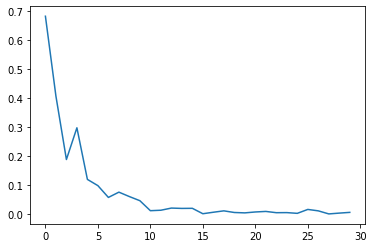

In [40]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1)
print('accuracy : {:.2%}'.format(np.mean(yhat == y_data)))

plt.plot(tr_loss_hist)

## many to many

In [42]:
sentences = [['I', 'feel', 'hungry'],
     ['tensorflow', 'is', 'very', 'difficult'],
     ['tensorflow', 'is', 'a', 'framework', 'for', 'deep', 'learning'],
     ['tensorflow', 'is', 'very', 'fast', 'changing']]
pos = [['pronoun', 'verb', 'adjective'],
     ['noun', 'verb', 'adverb', 'adjective'],
     ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
     ['noun', 'verb', 'adverb', 'adjective', 'verb']]

word_list = sum(sentences, [])
word_list = sorted(set(word_list))
word_list = ['<pad>'] + word_list
word2idx = {word : idx for idx, word in enumerate(word_list)}
idx2word = {idx : word for idx, word in enumerate(word_list)}

print(word2idx)
print(idx2word)
print(len(idx2word))

{'<pad>': 0, 'I': 1, 'a': 2, 'changing': 3, 'deep': 4, 'difficult': 5, 'fast': 6, 'feel': 7, 'for': 8, 'framework': 9, 'hungry': 10, 'is': 11, 'learning': 12, 'tensorflow': 13, 'very': 14}
{0: '<pad>', 1: 'I', 2: 'a', 3: 'changing', 4: 'deep', 5: 'difficult', 6: 'fast', 7: 'feel', 8: 'for', 9: 'framework', 10: 'hungry', 11: 'is', 12: 'learning', 13: 'tensorflow', 14: 'very'}
15


In [43]:
pos_list = sum(pos, [])
pos_list = sorted(set(pos_list))
pos_list = ['<pad>'] + pos_list
pos2idx = {pos : idx for idx, pos in enumerate(pos_list)}
idx2pos = {idx : pos for idx, pos in enumerate(pos_list)}

print(pos2idx)
print(idx2pos)
print(len(pos2idx))

{'<pad>': 0, 'adjective': 1, 'adverb': 2, 'determiner': 3, 'noun': 4, 'preposition': 5, 'pronoun': 6, 'verb': 7}
{0: '<pad>', 1: 'adjective', 2: 'adverb', 3: 'determiner', 4: 'noun', 5: 'preposition', 6: 'pronoun', 7: 'verb'}
8


In [44]:
max_sequence = 10
x_data = list(map(lambda sentence : [word2idx.get(token) for token in sentence], sentences))
y_data = list(map(lambda sentence : [pos2idx.get(token) for token in sentence], pos))

x_data = pad_sequences(sequences = x_data, maxlen = max_sequence, padding='post')
x_data_mask = ((x_data != 0) * 1).astype(np.float32)
x_data_len = list(map(lambda sentence : len(sentence), sentences))

y_data = pad_sequences(sequences = y_data, maxlen = max_sequence, padding='post')

print(x_data, x_data_len)
print(x_data_mask)
print(y_data)

[[ 1  7 10  0  0  0  0  0  0  0]
 [13 11 14  5  0  0  0  0  0  0]
 [13 11  2  9  8  4 12  0  0  0]
 [13 11 14  6  3  0  0  0  0  0]] [3, 4, 7, 5]
[[1. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 0. 0. 0. 0. 0. 0.]
 [1. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 1. 1. 0. 0. 0. 0. 0.]]
[[6 7 1 0 0 0 0 0 0 0]
 [4 7 2 1 0 0 0 0 0 0]
 [4 7 3 4 5 1 4 0 0 0]
 [4 7 2 1 7 0 0 0 0 0]]


In [45]:
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = input_dim, output_dim = output_dim, mask_zero = True,
                                   trainable = False, input_length = max_sequence,
                                   embeddings_initializer = tf.keras.initializers.Constant(one_hot)))
model.add(tf.keras.layers.SimpleRNN(units=hidden_dim, return_sequences=True))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
simple_rnn_6 (SimpleRNN)     (None, 10, 10)            260       
_________________________________________________________________
time_distributed_1 (TimeDist (None, 10, 8)             88        
Total params: 573
Trainable params: 348
Non-trainable params: 225
_________________________________________________________________


In [53]:
def loss_fn(model, x, y, x_len, max_sequence):
    masking = tf.sequence_mask(x_len, maxlen=max_sequence, dtype=np.float32)
    valid_time_step = tf.cast(x_len, dtype = tf.float32)
    sequence_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true = y,
                                                                   y_pred = model(x),
                                                                   from_logits=True) * masking
    sequence_loss = tf.reduce_sum(sequence_loss, axis=-1) / valid_time_step
    sequence_loss = tf.reduce_mean(sequence_loss)
    return sequence_loss

lr = 0.1
epochs = 30
batch_size = 2
opt = tf.keras.optimizers.Adam(learning_rate = lr)

tr_dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data, x_data_len))
tr_dataset = tr_dataset.shuffle(buffer_size=4)
tr_dataset = tr_dataset.batch(batch_size=2)

print(tr_dataset)

<BatchDataset shapes: ((None, 10), (None, 10), (None,)), types: (tf.int32, tf.int32, tf.int32)>


In [54]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x = x_mb, y = y_mb, x_len = x_mb_len, max_sequence = max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars = zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss)) 

epoch :   5, tr_loss : 0.171
epoch :  10, tr_loss : 0.009
epoch :  15, tr_loss : 0.001
epoch :  20, tr_loss : 0.001
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


[['pronoun', 'verb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']]
[['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


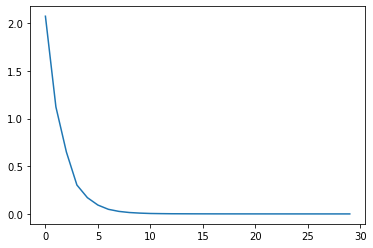

In [59]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],
                yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

plt.plot(tr_loss_hist)

## many to many bidirecitonal

1-4d와 모델 구축 제외 부분 동일

In [61]:
num_classes = len(pos2idx)
hidden_dim = 10

input_dim = len(word2idx)
output_dim = len(word2idx)
one_hot = np.eye(len(word2idx))

model = tf.keras.Sequential()
model.add(tf.keras.layers.Embedding(input_dim = input_dim, output_dim = output_dim, mask_zero = True,
                                   trainable=False, input_length = max_sequence,
                                   embeddings_initializer = tf.keras.initializers.Constant(one_hot)))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.SimpleRNN(units=hidden_dim, return_sequences=True)))
model.add(tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(units=num_classes)))

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 10, 15)            225       
_________________________________________________________________
bidirectional_1 (Bidirection (None, 10, 20)            520       
_________________________________________________________________
time_distributed_3 (TimeDist (None, 10, 8)             168       
Total params: 913
Trainable params: 688
Non-trainable params: 225
_________________________________________________________________


In [62]:
tr_loss_hist = []

for epoch in range(epochs):
    avg_tr_loss = 0
    tr_step = 0
    
    for x_mb, y_mb, x_mb_len in tr_dataset:
        with tf.GradientTape() as tape:
            tr_loss = loss_fn(model, x = x_mb, y = y_mb, x_len = x_mb_len, max_sequence = max_sequence)
        grads = tape.gradient(target=tr_loss, sources=model.variables)
        opt.apply_gradients(grads_and_vars = zip(grads, model.variables))
        avg_tr_loss += tr_loss
        tr_step += 1
    else:
        avg_tr_loss /= tr_step
        tr_loss_hist.append(avg_tr_loss)
        
    if (epoch + 1) % 5 == 0:
        print('epoch : {:3}, tr_loss : {:.3f}'.format(epoch + 1, avg_tr_loss)) 

epoch :   5, tr_loss : 0.037
epoch :  10, tr_loss : 0.003
epoch :  15, tr_loss : 0.000
epoch :  20, tr_loss : 0.000
epoch :  25, tr_loss : 0.000
epoch :  30, tr_loss : 0.000


[['pronoun', 'verb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun', '<pad>', '<pad>', '<pad>'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb', '<pad>', '<pad>', '<pad>', '<pad>', '<pad>']]
[['pronoun', 'verb', 'adjective'],
 ['noun', 'verb', 'adverb', 'adjective'],
 ['noun', 'verb', 'determiner', 'noun', 'preposition', 'adjective', 'noun'],
 ['noun', 'verb', 'adverb', 'adjective', 'verb']]


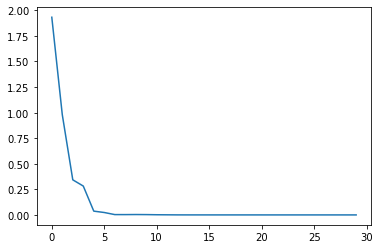

In [63]:
yhat = model.predict(x_data)
yhat = np.argmax(yhat, axis=-1) * x_data_mask

pprint(list(map(lambda row : [idx2pos.get(elm) for elm in row],yhat.astype(np.int32).tolist())), width = 120)
pprint(pos)

plt.plot(tr_loss_hist)